In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np

# Read data

In [61]:
os.makedirs("MPL_plots", exist_ok=True)

In [62]:
data = pd.read_csv("../data/honey.csv")
data

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


> Here I care about the yearly honey production of states. Let's try how to visualize them, which have a lot of records, best! 

# Bar chart

The first type of chart we commonly use for data categories is bar chart. However, vertiacal bar chart would be ugly in this case because we have too many `states`. Let's try horizontal bar chart instead. 

<BarContainer object of 44 artists>

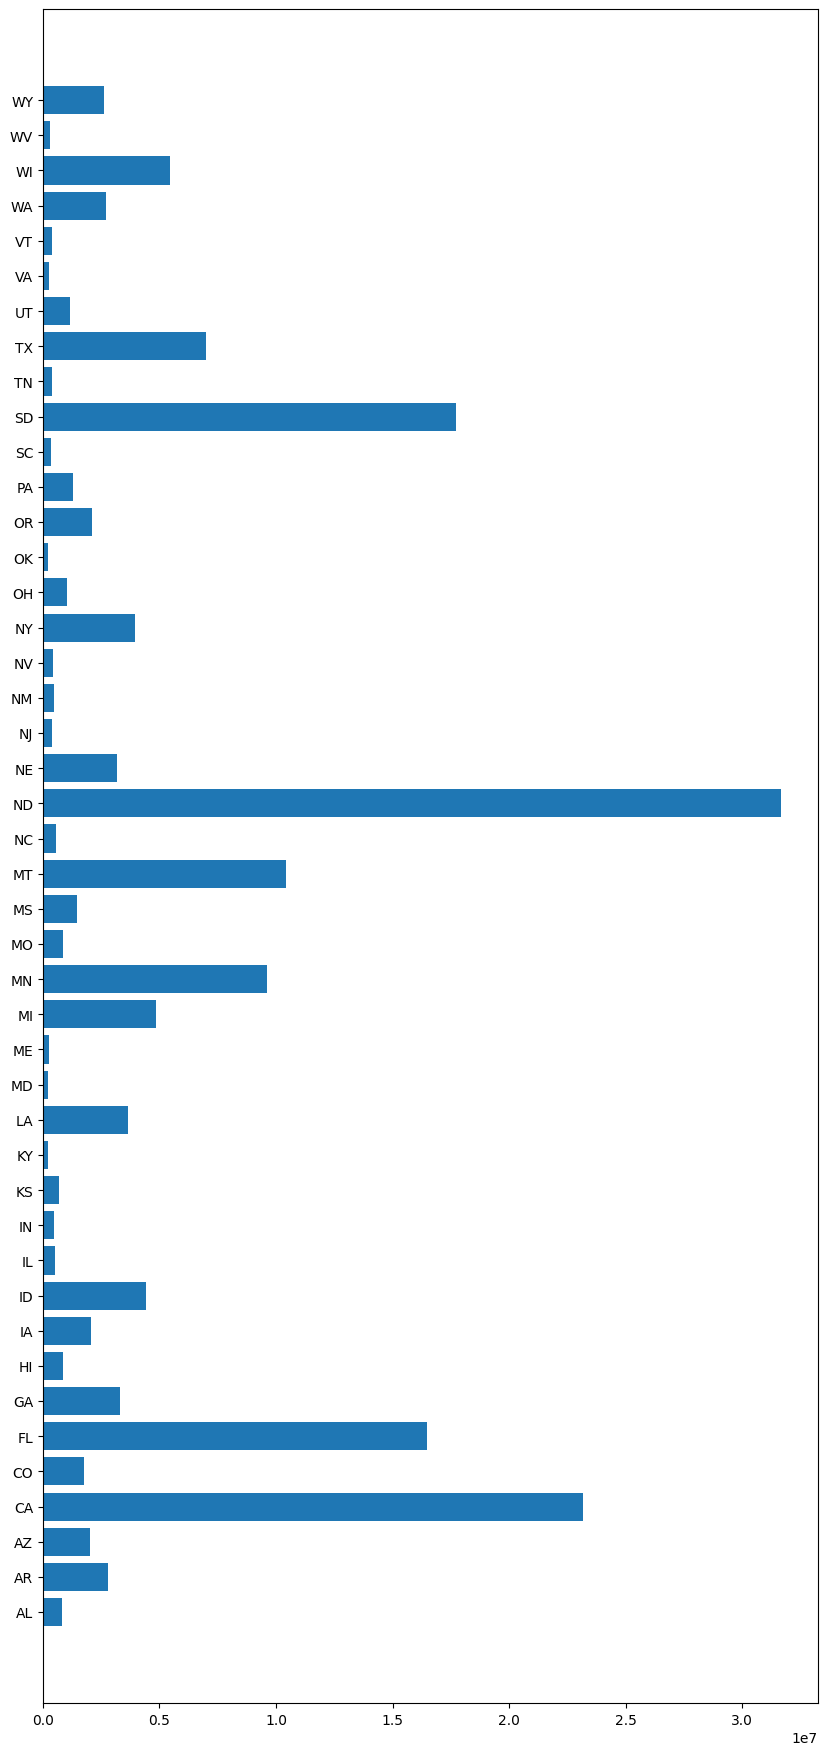

In [63]:
avg_yearly_prod = data.groupby("state")["totalprod"].mean()
n =len(avg_yearly_prod)
plt.figure(figsize=(10, n * 0.5))
plt.barh(avg_yearly_prod.index, avg_yearly_prod)

This plot shows little insight of what is happening, without any pattern, indicator, annotation or any hint! 

We can try:
- Sort them 
- Show errorbars

<BarContainer object of 44 artists>

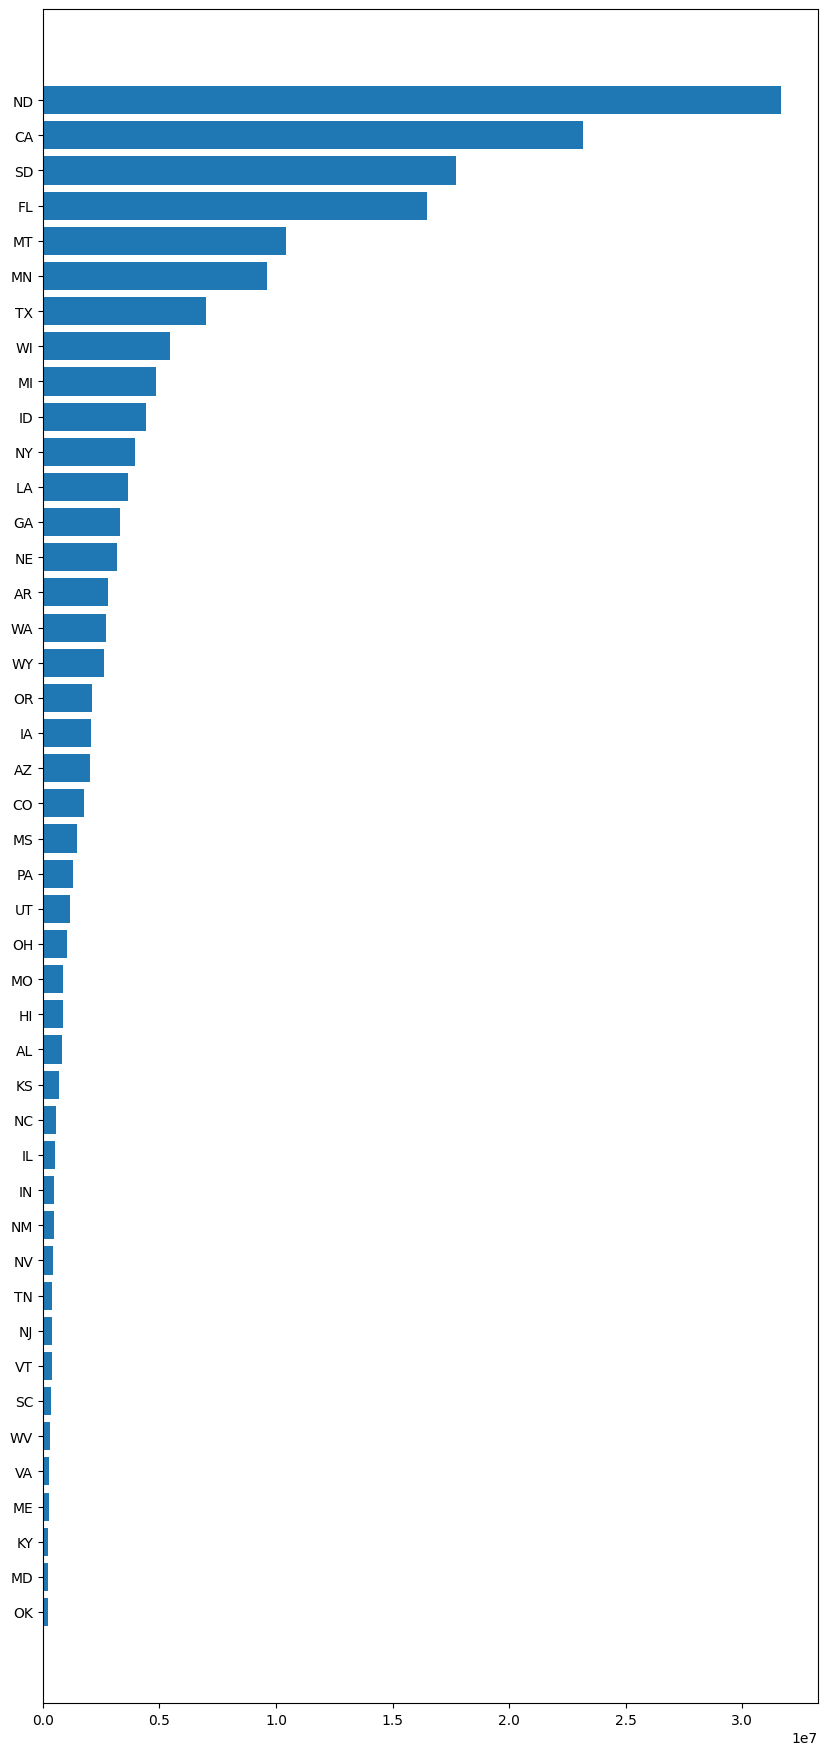

In [64]:
sorted_avg_yearly_prod = avg_yearly_prod.sort_values()
plt.figure(figsize=(10, n * 0.5))
plt.barh(sorted_avg_yearly_prod.index, sorted_avg_yearly_prod)

This implies more now! We know about which states have the highest honey production every year, and which have the lowest. But this is quite ugly. Another way to try is just to show top 10 states, but of course it only shows ones with highest amount!

<BarContainer object of 10 artists>

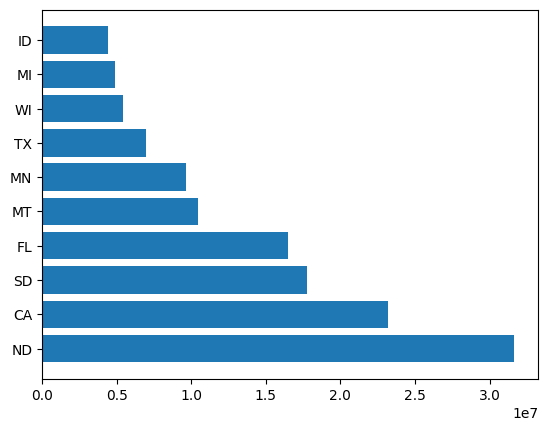

In [65]:
top10 = avg_yearly_prod.sort_values(ascending=False).head(10)
plt.barh(top10.index, top10)

The horizontal bar show data from bottom to top. Conventionally, we show top 10 with the highest value at the top! Let's reverse the plot.

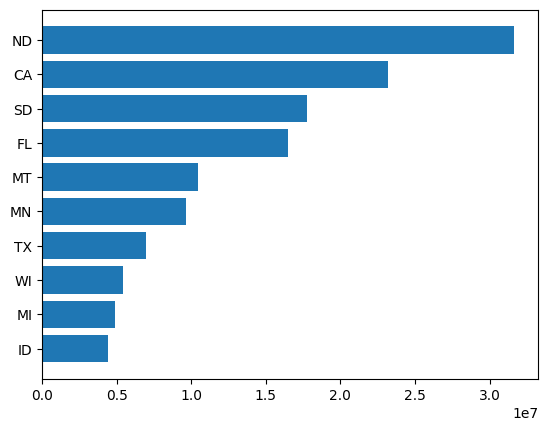

In [66]:
plt.barh(top10.index, top10)
plt.gca().invert_yaxis()
plt.show()

With fewer records we can try vertical bar chart, but personally I feel it looks like trend of something over time!

<BarContainer object of 10 artists>

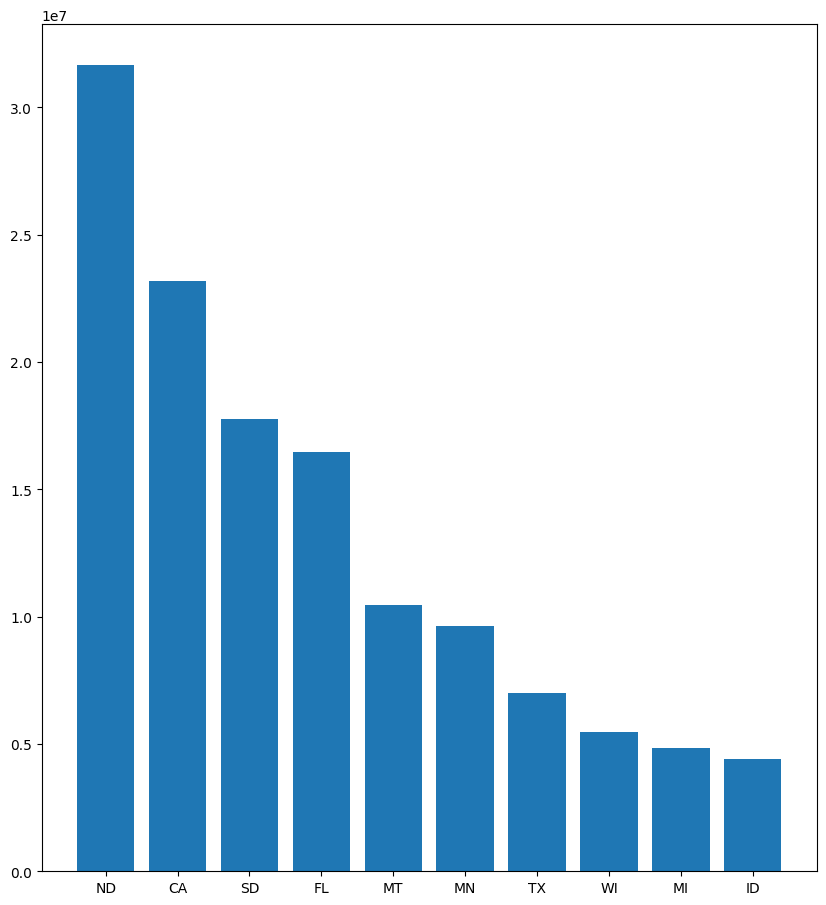

In [67]:
top10 = avg_yearly_prod.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, n * 0.25))
plt.bar(top10.index, top10)

Then we try solution 2: show errorbars!

An error bar is a small line (or range) drawn on a chart that shows how uncertain, variable, or spread out the data is. Here we try Standard Deviation, the most common option.

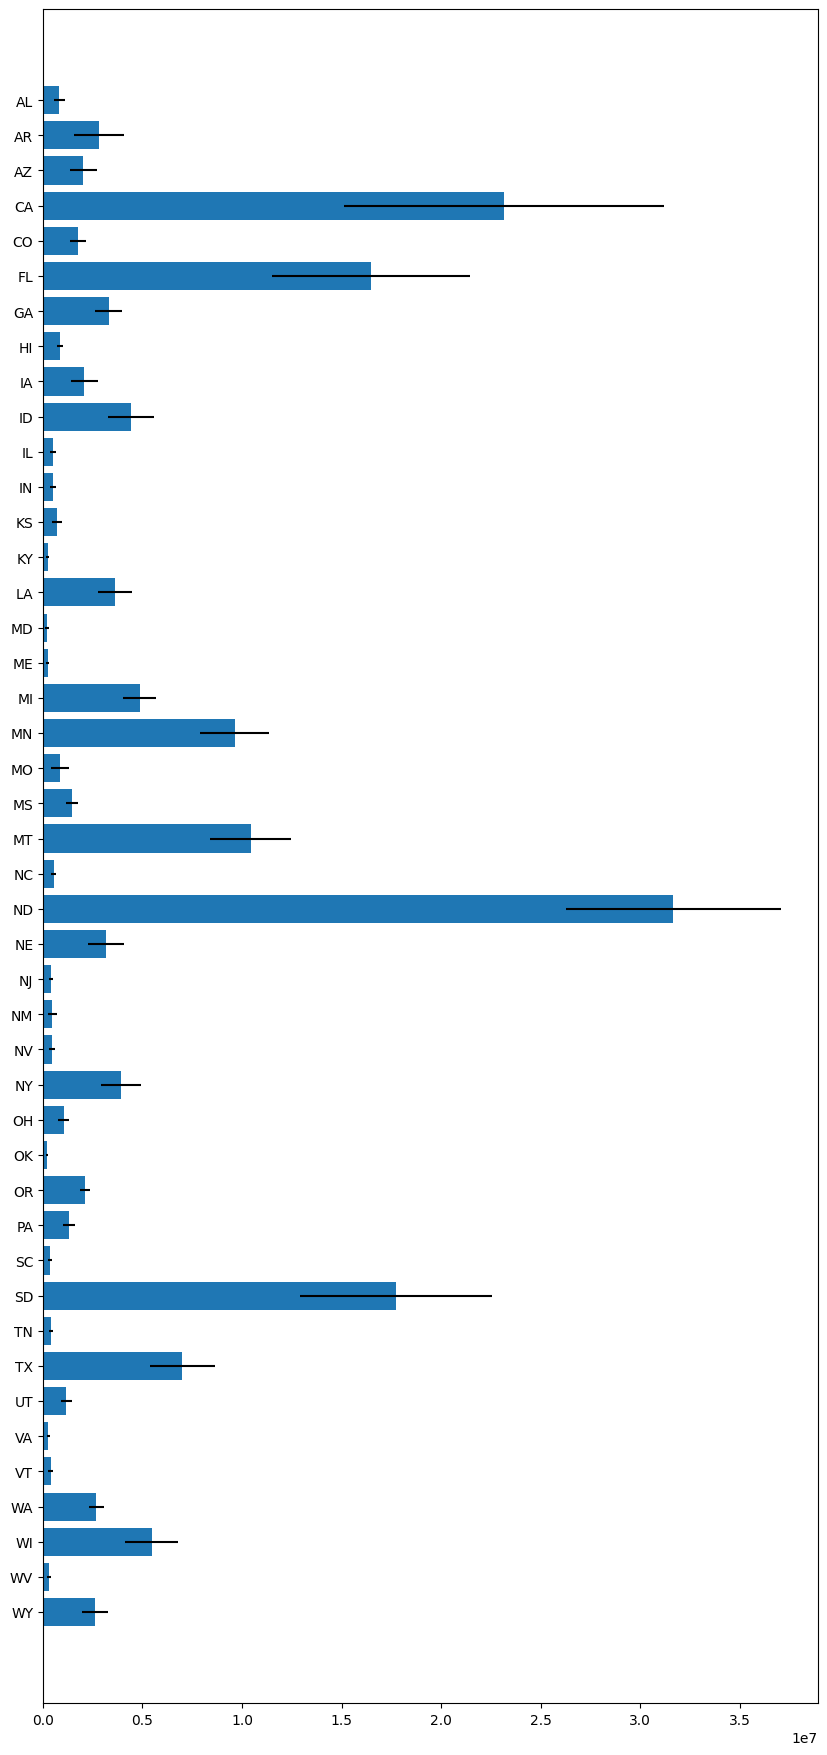

In [68]:
mean_prod = avg_yearly_prod
std_prod = data.groupby("state")["totalprod"].std()

plt.figure(figsize=(10, n * 0.5))
plt.barh(mean_prod.index, mean_prod, xerr=std_prod)
plt.gca().invert_yaxis()
plt.show()

Let's combine everything above: sort, select top 10, and show error bars!

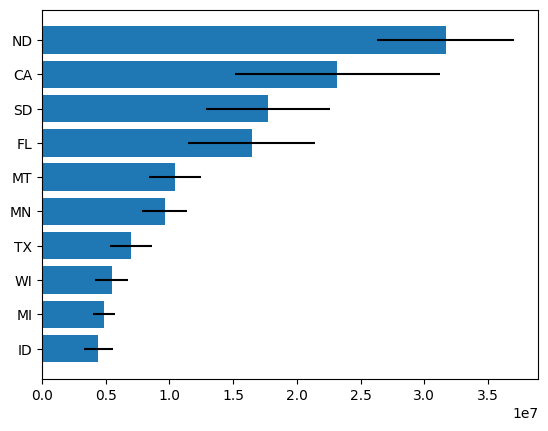

In [69]:
top10 = mean_prod.sort_values(ascending=False).head(10)
top10_std = std_prod.loc[top10.index]

plt.barh(top10.index, top10, xerr=top10_std)
plt.gca().invert_yaxis()
plt.show()

Let's give it some title (it deserves it!). We also need to guide the viewers how to read this plot.

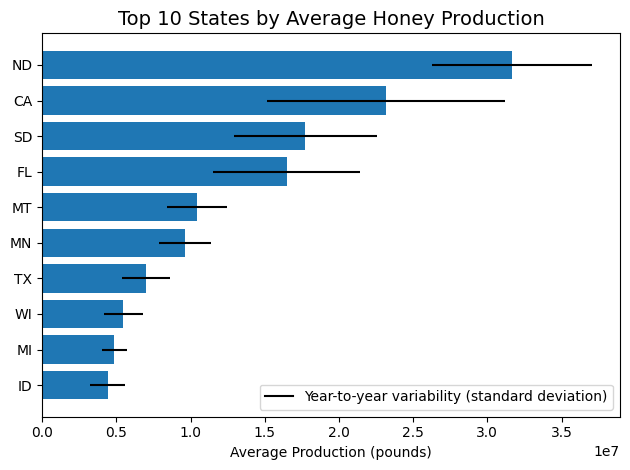

In [70]:
plt.barh(top10.index, top10, xerr=top10_std)

plt.gca().invert_yaxis()

# Create title and label
plt.title("Top 10 States by Average Honey Production", fontsize=14)
plt.xlabel("Average Production (pounds)")

# Create legend for error bars
from matplotlib.lines import Line2D
error_patch = Line2D([0], [0], color='black', lw=1.5, label='Year-to-year variability (standard deviation)')
plt.legend(handles=[error_patch])

plt.tight_layout()
plt.show()

The title is quite ambiguous, because we don't know what "average" really means. Let's add more context!

Also, the phrase "average production" is repeated (in both the title and the axis label). Let's reformat the x-axis by removing duplication, and turning 1e7 into M format.

In [71]:
year_min = data["year"].min()
year_max = data["year"].max()

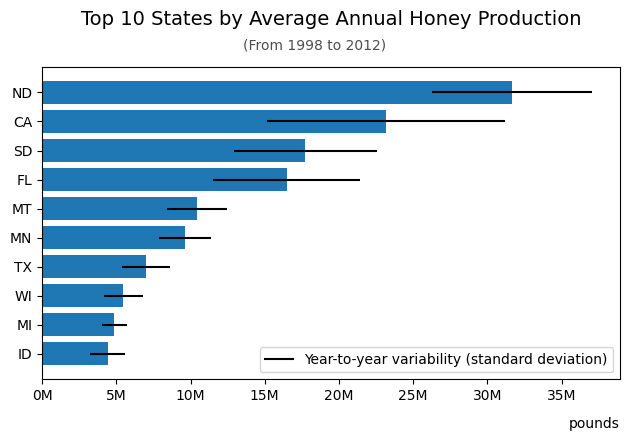

In [72]:
plt.barh(top10.index, top10, xerr=top10_std)

plt.gca().invert_yaxis()

plt.title("Top 10 States by Average Annual Honey Production", fontsize=14, pad=30)  # main title
plt.suptitle(f"(From {year_min} to {year_max})", fontsize=10, y=0.85, alpha=0.7)  # subtitle

from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    return f'{int(x/1_000_000)}M'
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))

plt.xlabel("pounds", labelpad=10, loc='right')

# Create legend for error bars
from matplotlib.lines import Line2D
error_patch = Line2D([0], [0], color='black', lw=1.5, label='Year-to-year variability (standard deviation)')
plt.legend(handles=[error_patch])

plt.tight_layout()
plt.show()

Let's try another color (maybe honey color 🐝), and make it more beautiful!

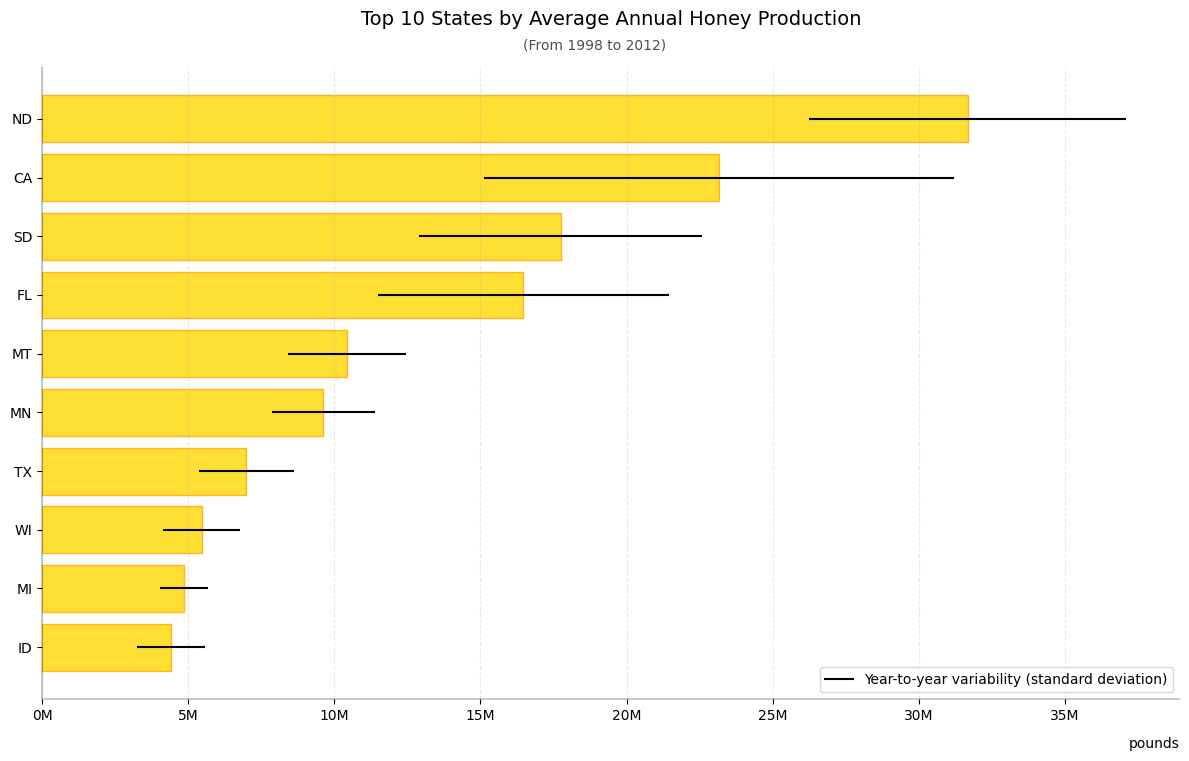

In [73]:
plt.figure(figsize=(12, 8))

plt.barh(
    top10.index,
    top10,
    xerr=top10_std,
    alpha=0.8,
    color="gold",
    ecolor="black",
    edgecolor="orange",
)

plt.gca().invert_yaxis()

# Add grid
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Modernize the spines
ax = plt.gca()      # gca = Get Current Axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.3)
ax.spines['bottom'].set_linewidth(0.3)

plt.title("Top 10 States by Average Annual Honey Production", fontsize=14, pad=30)  # main title
plt.suptitle(f"(From {year_min} to {year_max})", fontsize=10, y=0.91, alpha=0.7)  # subtitle

ax.xaxis.set_major_formatter(FuncFormatter(millions))

plt.xlabel("pounds", labelpad=10, loc='right')

# Create legend for error bars
from matplotlib.lines import Line2D
error_patch = Line2D([0], [0], color='black', lw=1.5, label='Year-to-year variability (standard deviation)')
plt.legend(handles=[error_patch])

plt.tight_layout()
plt.show()

We might need the state names instead of state codes, which is very hard to read.

In [74]:
state_name = data["state"].unique()
state_name

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'SC'],
      dtype=object)

Give ChatGPT the above output and we will have this `state_map`.

In [75]:
state_map = {
    'AL': 'Alabama', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii',
    'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine',
    'MD': 'Maryland', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
    'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas',
    'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'SC': 'South Carolina'
}

In [76]:
data["statename"] = data["state"].map(state_map)

In [77]:
top10_states_name = top10.index.to_series().map(state_map)

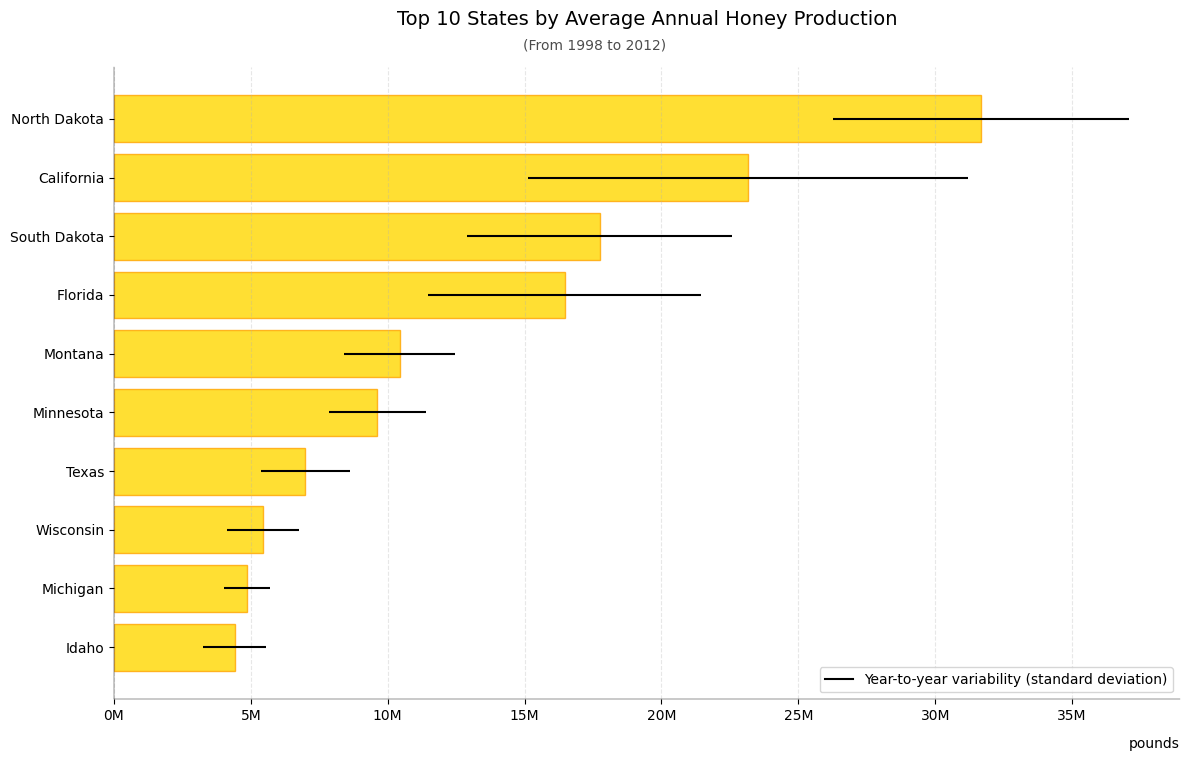

In [78]:
plt.figure(figsize=(12, 8))

plt.barh(
    top10.index,
    top10,
    xerr=top10_std,
    alpha=0.8,
    color="gold",
    ecolor="black",
    edgecolor="orange",
    label=top10_states_name,
    tick_label=top10_states_name    # Change the tick label here!!!
)

plt.gca().invert_yaxis()

# Add grid
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Modernize the spines
ax = plt.gca()      # gca = Get Current Axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.3)
ax.spines['bottom'].set_linewidth(0.3)

plt.title("Top 10 States by Average Annual Honey Production", fontsize=14, pad=30)  # main title
plt.suptitle(f"(From {year_min} to {year_max})", fontsize=10, y=0.91, alpha=0.7)  # subtitle

ax.xaxis.set_major_formatter(FuncFormatter(millions))

plt.xlabel("pounds", labelpad=10, loc='right')

# Create legend for error bars
from matplotlib.lines import Line2D
error_patch = Line2D([0], [0], color='black', lw=1.5, label='Year-to-year variability (standard deviation)')
plt.legend(handles=[error_patch])

plt.tight_layout()
plt.savefig("MPL_plots/01-hbar-variability.png")
plt.show()


Let's try another way to display the data: using position to illustrate the data instead of length.

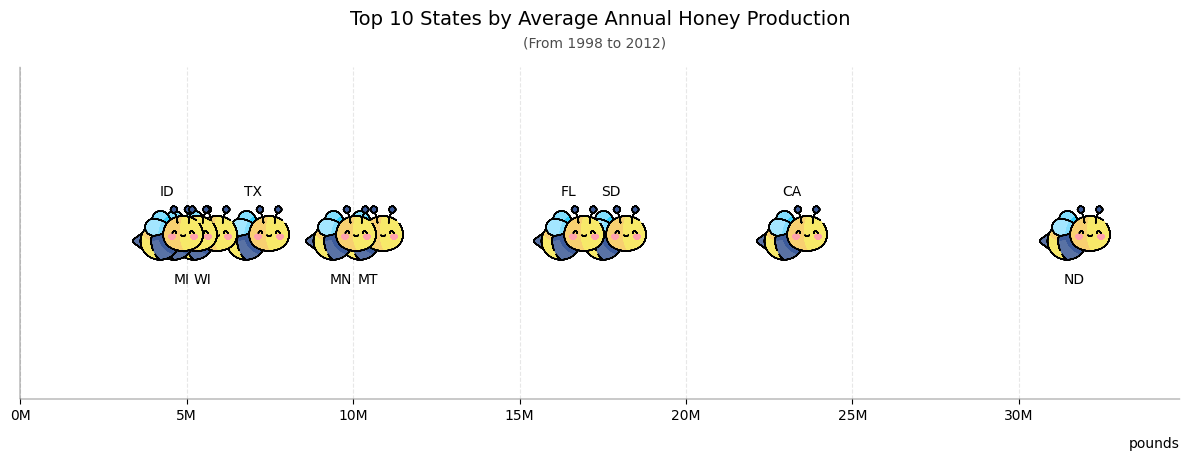

In [89]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random

plt.figure(figsize=(12, 5))  # short height for horizontal alignment
ax = plt.gca()

# ---- Load bee image ----
bee_img = mpimg.imread("bee.png")  # replace with your image path

def add_bee(x, y=1, zoom=0.12, label=None):
    """Place a bee image at (x, y)."""
    imagebox = OffsetImage(bee_img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

    if label:
        num = random.choice([1, -1.2])
        ax.text(x, y - 0.12 * num, label, ha='center', va='top', fontsize=10)

# ---- Add all bees along a single horizontal axis ----
for prod, state in zip(top10, top10.index):
    add_bee(prod, y=0.5, zoom=0.10, label=state)

# ---- Styling ----
plt.title("Top 10 States by Average Annual Honey Production", fontsize=14, pad=30)  # main title
plt.suptitle(f"(From {year_min} to {year_max})", fontsize=10, y=0.86, alpha=0.7)  # subtitle

ax.xaxis.set_major_formatter(FuncFormatter(millions))
plt.xlabel("pounds", labelpad=10, loc='right')
ax.set_yticks([])  # remove y-axis
ax.grid(axis='x', linestyle='--', alpha=0.3)

# Optional: set x-limits for better spacing
ax.set_xlim(0, max(top10)*1.1)

# Modernize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.3)
ax.spines['bottom'].set_linewidth(0.3)

plt.tight_layout()
plt.savefig("MPL_plots/02-bee-plot.png")
plt.show()



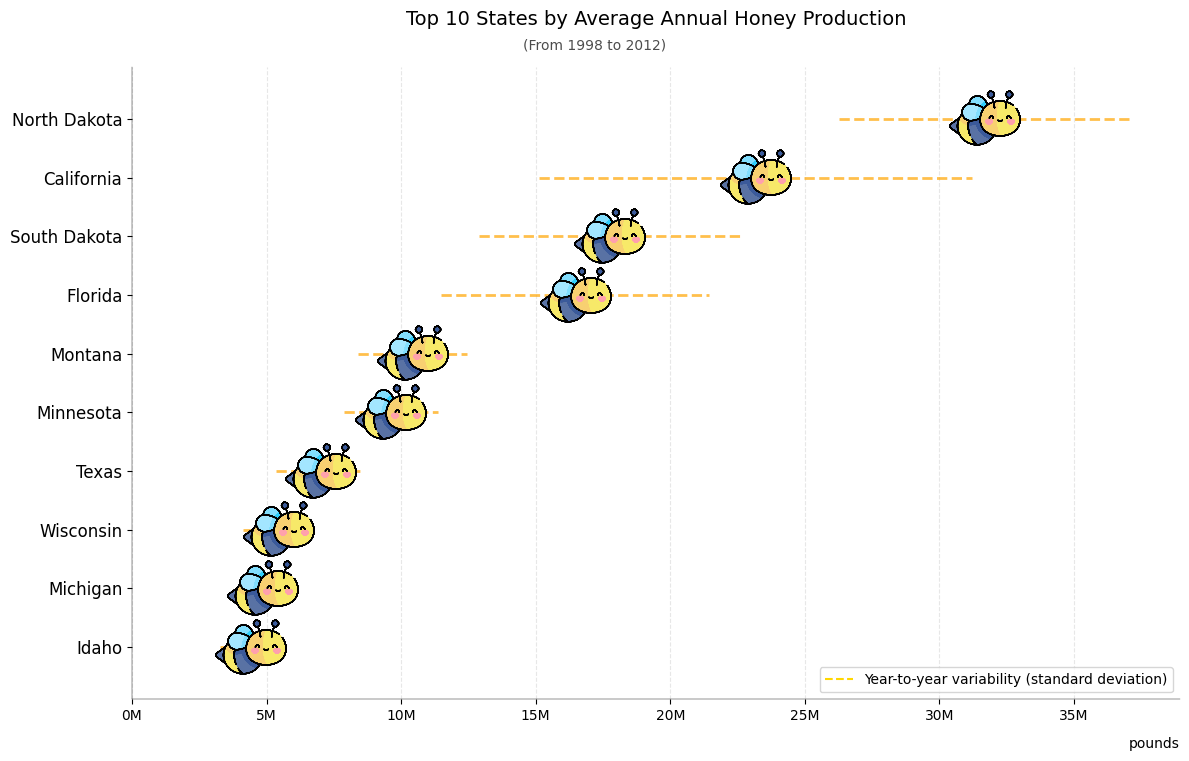

In [80]:
plt.figure(figsize=(12, 8))

ax = plt.gca()

# ---- Draw invisible bars (for spacing) ----
# Keep barh but make bars invisible so we can use y positions nicely
bars = ax.barh(
    top10.index,
    top10,
    alpha=0.0,                # fully transparent
)

ax.invert_yaxis()

# ---- Add the bee images ----
bee_img = mpimg.imread("bee.png")         # Load the bee image

def add_bee(x, y, zoom=0.12):
    """Place a bee image at (x, y). Adjust zoom to control size."""
    imagebox = OffsetImage(bee_img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

for i, (state, prod) in enumerate(top10.items()):
    y = i  # bar index
    add_bee(prod, y, zoom=0.10)   # adjust zoom for your bee size

# --- Draw error bars (optional) ---
err = ax.errorbar(
    top10.values,                     # x positions
    range(len(top10)),                # y positions
    xerr=top10_std,                   # error width
    fmt="none",                       # no marker
    ecolor="orange",                  # yellow color
    elinewidth=2,                     # optional thickness
    alpha=0.7,                        # transparency
    # linestyle="--",                   # dashed (this doesn't work so we set it as below)
    capsize=0                         # remove caps for clean dashed line
)

for barlinecol in err[2]:
    barlinecol.set_linestyle("--")

error_patch = Line2D([0], [0], color='gold', linestyle="--", lw=1.5, label='Year-to-year variability (standard deviation)')
plt.legend(handles=[error_patch])

# ---- Styling ----
ax.set_yticks(range(len(top10_states_name)))
ax.set_yticklabels(top10_states_name, fontsize=12)

ax.grid(axis='x', linestyle='--', alpha=0.3)

# Modernize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.3)
ax.spines['bottom'].set_linewidth(0.3)

plt.title("Top 10 States by Average Annual Honey Production", fontsize=14, pad=30)  # main title
plt.suptitle(f"(From {year_min} to {year_max})", fontsize=10, y=0.91, alpha=0.7)  # subtitle

ax.xaxis.set_major_formatter(FuncFormatter(millions))
plt.xlabel("pounds", labelpad=10, loc='right')

plt.tight_layout()
plt.savefig("MPL_plots/03-bee-plot-variability.png")
plt.show()


Beside length and position, we can also try illustrate the data by size.

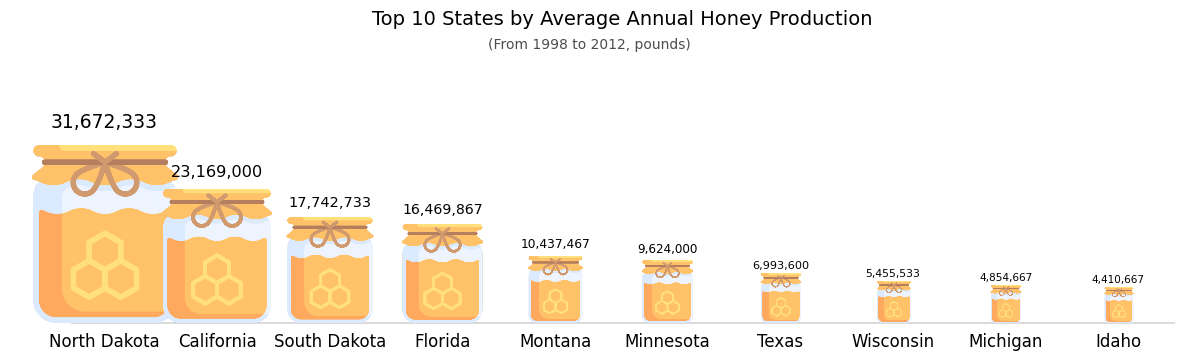

In [81]:
plt.figure(figsize=(12, 4))
ax = plt.gca()

# Load honey jar image
honey_img = mpimg.imread("honey.png")  # replace with your image path

# Normalize production values for image size scaling
prod_min, prod_max = min(top10), max(top10)
zoom_min, zoom_max = 0.05, 0.25  # min and max image sizes

def get_zoom(prod):
    """Scale production to zoom size for image."""
    return zoom_min + (prod - prod_min) / (prod_max - prod_min) * (zoom_max - zoom_min)

def add_honey(x, prod, label=None):
    """Place honey jar image at horizontal position x with size based on production."""
    zoom = get_zoom(prod)
    imagebox = OffsetImage(honey_img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, 0), frameon=False, box_alignment=(0.5,0))
    ax.add_artist(ab)
    
    # Annotate state name and production above the jar
    ax.annotate(statename, xy=(x, 0), xytext=(0, -20),
                textcoords='offset points', ha='center', va='bottom', fontsize=12)
    
    # Annotate state name and production above the jar
    ax.annotate(f"{prod:,.0f}", xy=(x, 0), xytext=(0, zoom * 550),
                textcoords='offset points', ha='center', va='bottom', fontsize=zoom*30+6)

# Evenly spaced x positions for states
x_positions = np.arange(len(top10))

# Add honey jars
for x, prod, statename in zip(x_positions, top10, top10_states_name):
    add_honey(x, prod, label=statename)

# Styling
plt.title("Top 10 States by Average Annual Honey Production", fontsize=14, pad=50)  # main title
plt.suptitle(f"(From {year_min} to {year_max}, pounds)", fontsize=10, y=0.82, alpha=0.7)  # subtitle

ax.xaxis.set_major_formatter(FuncFormatter(millions))

ax.set_xticks([])  # remove default x-ticks
ax.set_yticks([])
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Set x-limits for spacing
ax.set_xlim(-0.3, len(top10)-0.5)

# Modernize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.2)

plt.tight_layout()
plt.savefig("MPL_plots/04-honey-jar-plot.png")
plt.show()


Map plot

In [82]:
# Start from avg_yearly_prod (index = state codes)
df_map = avg_yearly_prod.reset_index()
df_map.columns = ['statecode', 'production']

# Add state names using state_map
df_map['statename'] = df_map['statecode'].map(state_map)

df_map.head()

,statecode,production,statename
0,AL,8.254667e+05,Alabama
1,AR,2.810400e+06,Arkansas
2,AZ,2.032267e+06,Arizona
3,CA,2.316900e+07,California
4,CO,1.750600e+06,Colorado


In [83]:
import plotly.express as px

# Customize hover_data for better tooltip
fig = px.choropleth(
    df_map,
    locations='statecode',
    locationmode='USA-states',
    color='production',
    color_continuous_scale=['#ffffb2', '#fe9929'],
    scope='usa',
)

# Customize tooltip
fig.update_traces(
    hovertemplate='<b>%{customdata[0]}</b><br>' +  # state name
                  'Average honey production: %{z:,.2f} pounds<extra></extra>',
    customdata=df_map[['statename']]  # pass state names as customdata
)

# --- Update layout ---
fig.update_layout(
    title_text='US Average Honey Production by State',
    title=dict(x=0.5),
    geo=dict(
        showlakes=True, lakecolor='lightblue',
        showframe=False, showcoastlines=True
    ),
    width=800,     
    height=600,
    coloraxis_colorbar=dict(
        title="pounds",
        orientation='h',
        xanchor='center',
        x=0.5,
        y=0        
    ),
    annotations=[dict(
        text=f"(From {year_min} to {year_max})",
        x=0.5,
        y=1.05,
        xref='paper',
        yref='paper',
        showarrow=False,
        font=dict(size=12, color='gray'),
    )]
)

fig.write_image("MPL_plots/05-choropleth-map.png")
fig.show()


Treemap

In [84]:
# Calculate percentage for each state
df_map['percentage'] = df_map['production'] / df_map['production'].sum() * 100

# Custom color scale
custom_colorscale = [
    [0.0, '#ffffb2'],  # light yellow
    [0.5, '#ffd700'],  # gold
    [1.0, '#fe9929']   # orange
]

fig = px.treemap(
    df_map,
    path=['statename'],
    values='production',
    color='production',
    color_continuous_scale=custom_colorscale,
    title='US Average Honey Production by State'
)

# Customize tooltip to include percentage
fig.update_traces(
    textinfo="label+value",
    hovertemplate=(
        "<b>%{label}</b><br>"
        "Average honey production:<br>"
        "%{value:,.2f} pounds (%{customdata[0]:.2f}%)<extra></extra>"
    ),
    customdata=df_map[['percentage']]  # pass percentage to hovertemplate
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.write_image("MPL_plots/06-treemap.png")

fig.show()


# Lolipop chart

In [85]:
num_of_records = len(df_map)

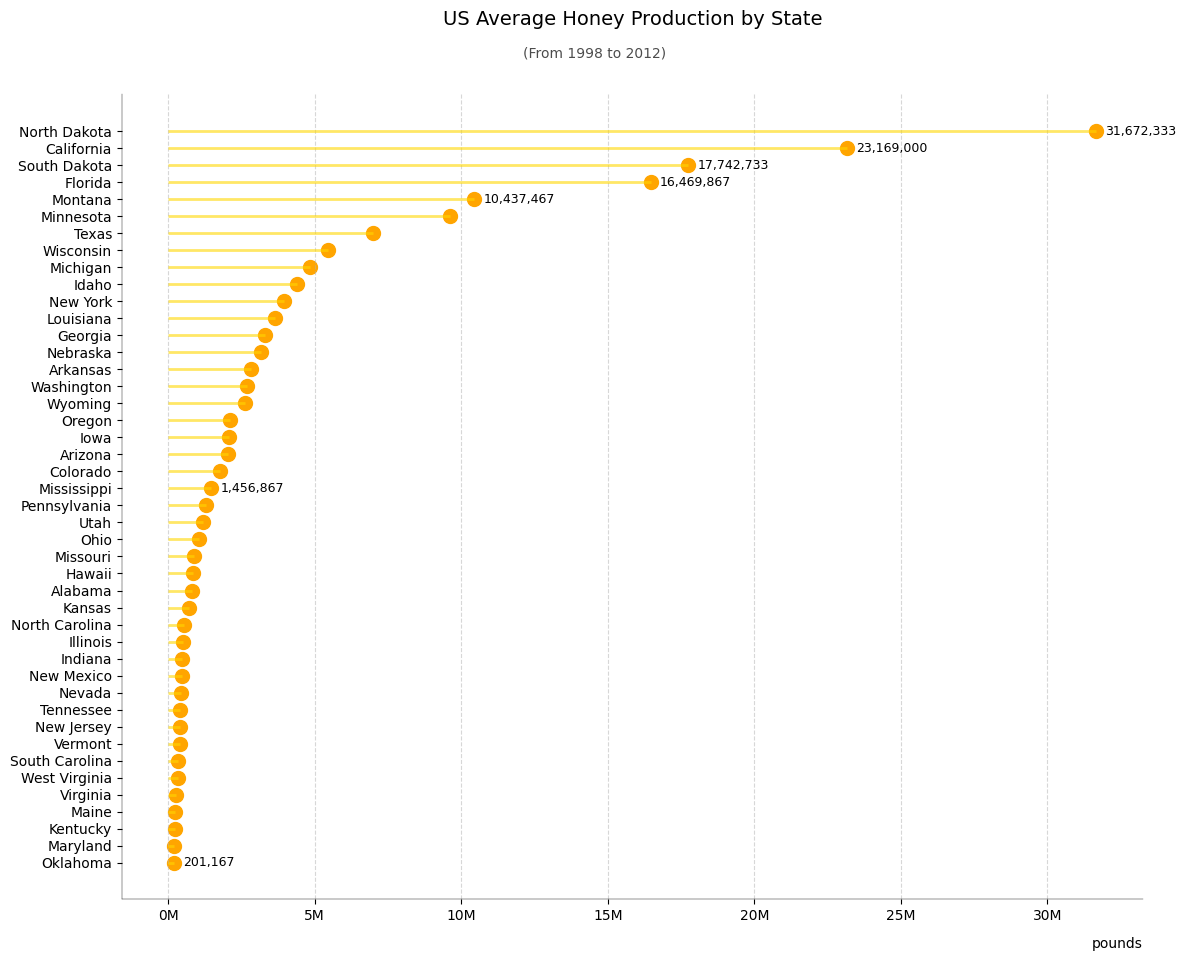

In [86]:
# Sort by production
df_sorted = df_map.sort_values(by="production", ascending=True)  # ascending for horizontal lollipop

plt.figure(figsize=(12, 10))

# Draw stems (lines)
plt.hlines(y=df_sorted['statename'], xmin=0, xmax=df_sorted['production'], color='gold', alpha=0.6, linewidth=2)

# Draw dots
plt.scatter(df_sorted['production'], df_sorted['statename'], color='orange', s=100)

# Add production value + percentage as text
for i, (prod, perc) in enumerate(zip(df_sorted['production'], df_sorted['percentage'])):
    if (i >= num_of_records - 5 or i == num_of_records/2 or i == 0):
        plt.text(prod + df_sorted['production'].max()*0.01, df_sorted['statename'].iloc[i],
            f"{prod:,.0f}",
            va='center', fontsize=9)

plt.title("US Average Honey Production by State", fontsize=14, pad=50)  # main title
plt.suptitle(f"(From {year_min} to {year_max})", fontsize=10, y=0.92, alpha=0.7)  # subtitle
plt.grid(axis='x', linestyle='--', alpha=0.5)


ax = plt.gca()     

ax.xaxis.set_major_formatter(FuncFormatter(millions))
plt.xlabel("pounds", labelpad=10, loc='right')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.3)
ax.spines['bottom'].set_linewidth(0.3)

plt.tight_layout()
plt.savefig("MPL_plots/07-lollipop-chart.png")

